In [1]:
import matplotlib as mpl
mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
import sys
import os
import errno
from reverse_cmap import rcmap

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
        #logging.debug('destination folder created !')
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            #logging.debug('destination folder exists already!')
            raise

dirc=sys.argv

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/'+dirc[1]+'_'+dirc[2]+'/'
            
source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realqflux4/'
make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/")
make_sure_path_exists("/project2/tas1/pragallva/Fall_quarter_2017/figures/stream_wind_ht/")

fig_dest="/project2/tas1/pragallva/Fall_quarter_2017/figures/stream_wind_ht/"

dirc=sys.argv
#title=dirc[1]+"  "+dirc[2].split("_")[0]+"m"+"  "+dirc[2].split("_")[1]
#title =dirc[1]+"  "+dirc[2]

# second_part=dirc[2].split("_")
# if len(second_part)>1 :
#     title = dirc[1]+"_"+second_part[0]+"_"+second_part[1]
# else :
#     title = dirc[1]+"_"+second_part[0]

# u_v           =load(source+"u_v.hkl")


In [2]:
import netCDF4 as nc
filename="/project2/tas1/pragallva/Fall_quarter_2017/land_files/Ruth_full.nc"
data=nc.Dataset(filename,'r')
land_mask=data.variables['land_mask'][:]
zsurf=data.variables['zsurf'][:]
lat=data.variables['lat'][:]
lon=data.variables['lon'][:]

In [86]:
ls /project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realqflux4

coord_dic.hkl      flux_interp_dict.hkl  u_v.hkl
div_flux_dict.hkl  ht_temp_sphum.hkl     zonal_decomposed_fluxes_dic.hkl
EKE.npy            stream_dic.hkl        zonal_radiation_dic.hkl
fluxes_dic.hkl     time.npy


In [4]:
ht_temp_sphum =load(source+"ht_temp_sphum.hkl")

In [97]:
F=load(source+"div_flux_dict.hkl")

In [99]:
F['TE'].shape

(1741, 12)

In [94]:
mse.shape

(1440, 64, 128)

In [90]:
te.shape

(1741, 12)

In [5]:
% matplotlib inline
stream_dic    =load(source+"stream_dic.hkl")

In [6]:
% matplotlib inline
coord        =load(source+"coord_dic.hkl")    ## save the interpolated plevs here using something like my_dict.update({'key 2': 'value 2', 'key 3': 'value 3'})

In [9]:
u_v          =load(source+"u_v.hkl") 

In [14]:
% matplotlib inline
lat = coord['lat']
lon = coord['lon']
# #plev= coord_dic['interp_plev']
plev= np.array([0.5 ,10.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 600.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0])
#u   = u_v['u']
#v   = u_v['v']
ht  = load(source+"ht_temp_sphum.hkl")['ht'] #ht_temp_sphum['ht']
#stm = stream_dic['stream_func']

In [50]:
m=range(13)
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

import reverse_cmap as rc
my_cmap_r  = rc.rcmap(cm.RdBu)

## Calculate mass stream function ##
a=6371e3 ## Radius of earth in meters

import scipy.integrate as integrate
def integ( x) :    
    lo=np.deg2rad(coord['lon']) ;  
    la=np.deg2rad(coord['lat']) ;
    
    l1=59; l2=151;
    lons_arr= np.squeeze(np.where((lon>l1) & (lon<l2)))

    v_wind = x[:,:,:,np.squeeze(lons_arr)].mean(axis=-1)
    v_wind = v_wind*np.cos(la)[None,None,:] 
    x=v_wind    
    l= plev
    ax=1
    int_x = integrate.cumtrapz(x, l ,axis=ax, initial=None) #  (This is basically integration from - 90 deg)                                        
    return int_x
mass_stream=1*(2.0*np.pi*a/10.0)*integ(v) # for vertical integration


##### Calculate the horizontal stream function

import numpy.ma as ma

def stream_func(x,y) :    
     
    a=6371e03
    LON=np.deg2rad(lon) ;  
    LAT=np.deg2rad(lat)[::-1] ;
    
    uwnd = x.filled(fill_value=0)[:,:,::-1,:]
    vwnd = y.filled(fill_value=0)
    
    t=0;p=1;la=2;lo=3;
    ## udx
    uint = integrate.cumtrapz(uwnd, LAT ,axis=2, initial=None) 
    ## vdy
    #vint = integrate.cumtrapz(vwnd[:,:,0,:], LON ,axis=-1, initial=None)[:,:,None,:]  
    #vint = vint*np.cos(LAT[0])
 
    sf=-uint[:,:,::-1,:]#+vint[:,:,:,:]
    sf= ma.masked_array(sf, x[:,:,:-1,:].mask)
    return a*sf

#stream=stream_func(u,v)
stream=stm

def plot_monsoon(x, h=0):
    mo=7
    m=30*4*(mo-1)+16*4 
    twenty_days=20*4
    H1=850-1;H2=850+1
    H_lev= np.where((plev>H1) & (plev<H2))    
    L1=150-1;L2=150+1
    L_lev= np.where((plev>L1) & (plev<L2))    
    post_monsoon_H= np.squeeze(x[m:m+twenty_days,H_lev,:,:])
    post_monsoon_L= np.squeeze(x[m:m+twenty_days,L_lev,:,:])
    if h : ## geopotential
        X= coord['lon']; Y = coord['lat']
        vv          = np.linspace(np.min(post_monsoon_H),np.max(post_monsoon_H),29,endpoint=True)
    else :
        X= coord['lon']; Y = coord['lat']#[:-1]
        vv          = np.linspace(-5E7,5E7,29,endpoint=True)
    co_H          = (post_monsoon_H).mean(axis=0)
    co_L          = (post_monsoon_L).mean(axis=0)
    b           = py.contourf(X, Y, co_H, vv, cmap=my_cmap_r,  extend='both'); py.colorbar(b)
    b.ax.tick_params(labelsize=20)
    print np.min(co_H), np.max(co_H)
    cn          = np.arange(np.min(co_L),np.max(co_L),2000)
    c           = py.contour(X, Y, co_L, cn,colors='k',linewidths=0.5 )     
    py.clabel(c, fmt = '%1.0E', fontsize=10, inline=1)    
    d           = py.contour(coord['lon'], coord['lat'], land_mask, colors='lightgrey')
    py.tick_params(labelsize=18,size=4,width=2)
    py.xticks(range(0,361,60))
    py.yticks(range(-90,91,30))
    
def plot_vert_monsoon(x, post=1):       
    if post :
        mo=7
        m=120*(mo-1)+16*4
        twenty_days=20*4
    else :
        mo=4
        m=120*(mo-1)+00*4
        twenty_days=20*4
    l1=59; l2=151;
    lons_arr= np.squeeze(np.where((lon>l1) & (lon<l2)))
    
    wind = x[:,:,:,np.squeeze(lons_arr)].mean(axis=-1)
    z_wind = np.squeeze(wind[m:m+twenty_days,:,:]).mean(axis=0)
    ms   = mass_stream[m:m+twenty_days,:,:].mean(axis=0)
    vv          = np.arange(-60,70,10)
    b           = py.contourf(coord['lat'], plev, z_wind , vv, cmap=my_cmap_r,  extend='both'); 
    py.colorbar(b)    
    b.ax.tick_params(labelsize=20)
    mss         = np.arange(np.min(ms),np.max(ms),0.8*10**9) ## Ruth used a contour interval of 60*10^9
    #print np.min(ms)/10**9,np.max(ms)/10**9
    c           = py.contour(coord['lat'], plev[1:], ms, mss, colors='k',linewidths=0.5 ) #; py.clabel(c, fmt = '%1.0E', fontsize=10, inline=1)        
    py.xlim(-60,60)
    py.xticks(range(-60,61,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.gca().invert_yaxis()



In [51]:
def plot_Ruth() :
    
    fig=py.figure(figsize=(20, 10))
    py.suptitle(" Land-real other diagnostics",fontsize=35,y=1.010)
           
    py.subplot(221)
    # plot zonal wind and MMC stream function pre-monsoon 
    plot_vert_monsoon(u, post=0)
    py.title('u wind & MMC (pre onset)',fontsize=30)

    py.subplot(222)
    # plot zonal wind and MMC stream function post-monsoon 
    plot_vert_monsoon(u, post=1)
    py.title('u wind & MMC (post onset)',fontsize=30)

    py.subplot(223)
    plot_monsoon(ht, h=1)
    # plot geopotential post-monsoon onset
    py.title('geo at 850 hPa and 150 hPa',fontsize=30)

    py.subplot(224)
    plot_monsoon(stream)
    # plot stream function post-monsoon onset
    py.title('stream at 850 hPa and 150 hPa',fontsize=30)

    py.subplots_adjust(left=0.12, right=0.95, top=0.92, bottom=0.010)
    #py.savefig(fig_dest+'check_Ruth.pdf')
    #print fig_dest+title+'_Ruth.pdf'
    py.show()

# plot_Ruth()

In [59]:
def plot_monsoon(x, h=0):
    mo=7
    m=30*4*(mo-1)+16*4 
    twenty_days=20*4
    H1=850-1;H2=850+1
    H_lev= np.where((plev>H1) & (plev<H2))    
    L1=150-1;L2=150+1
    L_lev= np.where((plev>L1) & (plev<L2))    
    post_monsoon_H= np.squeeze(x[m:m+twenty_days,H_lev,:,:])
    post_monsoon_L= np.squeeze(x[m:m+twenty_days,L_lev,:,:])
    
    co_H        = (post_monsoon_H).mean(axis=0)
    co_L        = (post_monsoon_L).mean(axis=0)

    if h :
        co_H    = co_H*10 # height in the units of m^2/s^-2
        co_L    = co_L*10 # height in the units of m^2/s^-2
        vv      = np.arange(np.min(co_H),np.max(co_H),200)
        vc      = np.arange(np.min(co_L),np.max(co_L),2000)
        print vc
        print "np.min(co_L), np.max(co_L)", np.min(co_L), np.max(co_L)
        print "np.min(co_H),np.max(co_H)", np.min(co_H),np.max(co_H)
        #vv     = np.arange(-3E7,+3.5E7,+0.5E7)
    else :
        vv      = np.arange(-3E7,+3.5E7,+0.5E7)
        vc      = np.arange(np.min(co_L),np.max(co_L),+2E7)

    b           = py.contourf(coord['lon'], coord['lat'], co_H, vv, cmap=my_cmap_r,  extend='both'); cbar=py.colorbar(b)
    cbar.ax.tick_params(labelsize=20)
    c           = py.contour (coord['lon'], coord['lat'], co_L, vc,  colors='k',linewidths=0.5 )     
    #py.clabel(c, fmt = '%1.0E', fontsize=10, inline=1)    
    d           = py.contour(coord['lon'], coord['lat'], land_mask, colors='lightgrey')
    py.tick_params(labelsize=18,size=4,width=2)
    py.xticks(range(0,361,60),fontsize=15)
    py.yticks(range(-90,91,30),fontsize=15)  

[ 120743.80209434  122743.80209434  124743.80209434  126743.80209434
  128743.80209434  130743.80209434  132743.80209434  134743.80209434
  136743.80209434  138743.80209434  140743.80209434]
np.min(co_L), np.max(co_L) 120743.802094 141056.990839
np.min(co_H),np.max(co_H) 9597.01257753 15194.5350406


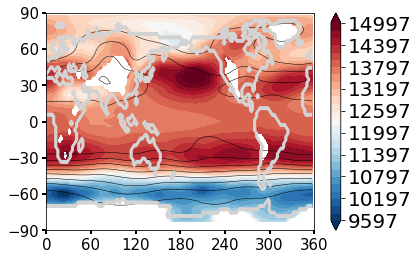

In [60]:
import reverse_cmap as rc
my_cmap_r  = rc.rcmap(cm.RdBu)
plot_monsoon(ht, h=1)

# See the seasonal evolution of Rossby waves 

In [7]:
m=range(13)
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

import reverse_cmap as rc
my_cmap_r  = rc.rcmap(cm.RdBu)


In [8]:
stm = stream_dic['stream_func']
lat = coord['lat']
lon = coord['lon']


In [45]:
plev= np.array([0.5 ,10.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 600.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0])

L1=150-1;L2=150+1
L_lev= np.where((plev>L1) & (plev<L2))    

def plot_stream_geo(x,m,h=0):
    twenty_days=20*4
    H1=850-1;H2=850+1
    H_lev= np.where((plev>H1) & (plev<H2))    
    L1=150-1;L2=150+1
    L_lev= np.where((plev>L1) & (plev<L2)) 
    x=x-x.mean(axis=-1)[:,:,:,None]
    post_monsoon_H= np.squeeze(x[m,H_lev,:,:])
    post_monsoon_L= np.squeeze(x[m,L_lev,:,:])
    
    co_H          = (post_monsoon_H)
    co_L          = (post_monsoon_L)
    if h : ## geopotential
        X= lon; Y = lat
#         co_H    = co_H*10 # height in the units of m^2/s^-2
        co_L   = co_L*10 # height in the units of m^2/s^-2
#         vv      = np.arange(np.min(co_H),np.max(co_H),200)
        vc      = np.arange(-3000,3500,1000)
#         print vc
#         print "np.min(co_L), np.max(co_L)", np.min(co_L), np.max(co_L)
#         print "np.min(co_H),np.max(co_H)", np.min(co_H),np.max(co_H)
    else :
        X= lon; Y = lat#[:-1]
        vv      = np.arange(-3E7,+3.5E7,+0.5E7)
        vc      = np.arange(-5E7,+5.5E7,+1.0E7)
#         print np.min(co_L),np.max(co_L)

#    b           = py.contourf(coord['lon'], coord['lat'], co_H, vv, cmap=my_cmap_r,  extend='both'); 
#    cbar=py.colorbar(b)    
#    cbar.ax.tick_params(labelsize=15)
    c           = py.contourf(coord['lon'], coord['lat'], co_L, vc, cmap=my_cmap_r,  extend='both' ) 
    cbar=py.colorbar(c)    
    cbar.ax.tick_params(labelsize=15)
    #py.clabel(c, fmt = '%1.0E', fontsize=10, inline=1)    
    d           = py.contour(coord['lon'], coord['lat'], land_mask, colors='k',lw=0.005)
    py.tick_params(labelsize=18,size=4,width=2)
    py.xticks(range(0,361,60),fontsize=15)
    py.yticks(range(-90,91,30),fontsize=15)

    py.show()

In [11]:
st=stm.reshape((12,30,4,20,len(lat),len(lon))).mean(axis=1).mean(axis=1)


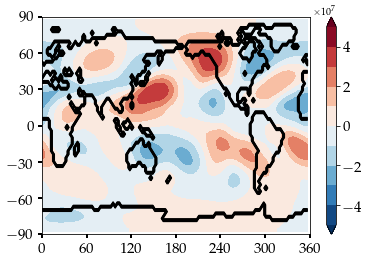

In [60]:
m=0
plot_stream_geo(st,m,h=0)

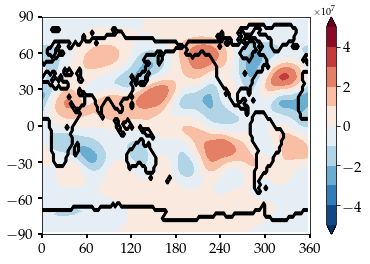

In [62]:
m=1
plot_stream_geo(st,m,h=0)

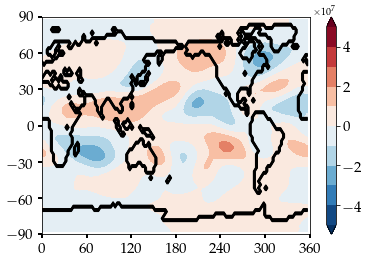

In [64]:
m=2
plot_stream_geo(st,m,h=0)

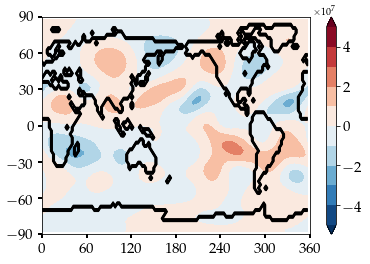

In [66]:
m=3
plot_stream_geo(st,m,h=0)

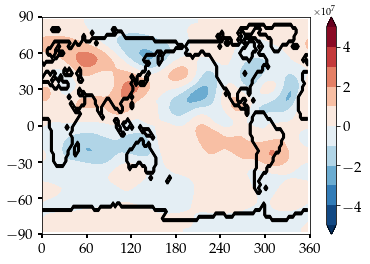

In [68]:
m=4
plot_stream_geo(st,m,h=0)

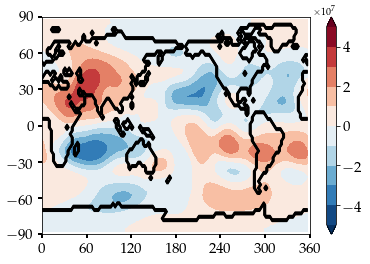

In [70]:
m=5
plot_stream_geo(st,m,h=0)

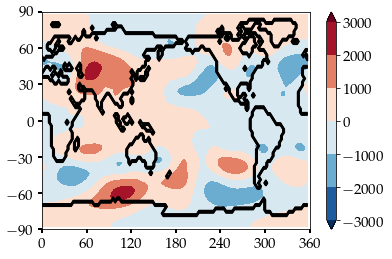

In [71]:
plot_stream_geo(ht,m,h=1)

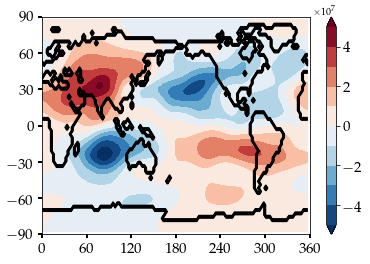

In [72]:
m=6
plot_stream_geo(st,m,h=0)

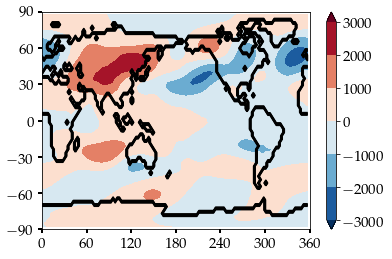

In [73]:
plot_stream_geo(ht,m,h=1)

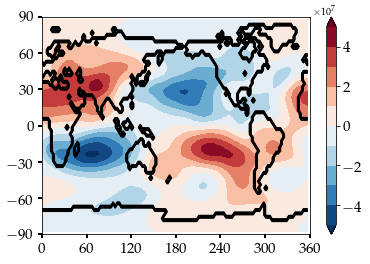

In [74]:
m=7
plot_stream_geo(st,m,h=0)

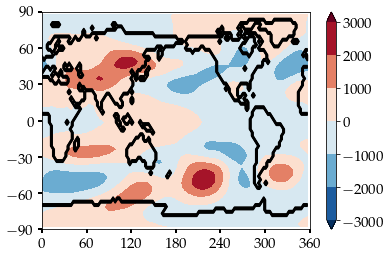

In [75]:
plot_stream_geo(ht,m,h=1)

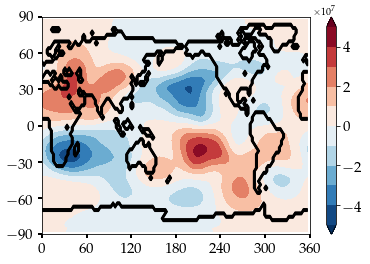

In [76]:
m=8
plot_stream_geo(st,m,h=0)

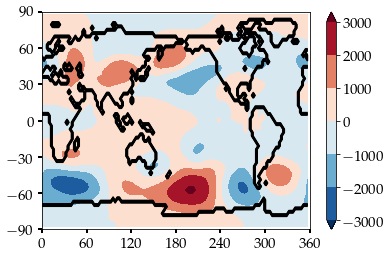

In [77]:
plot_stream_geo(ht,m,h=1)

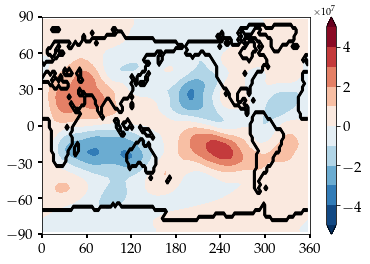

In [78]:
m=9
plot_stream_geo(st,m,h=0)

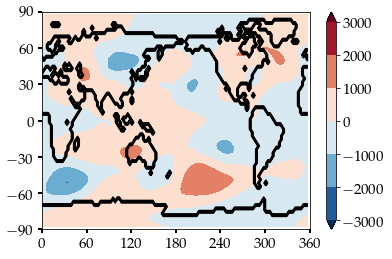

In [79]:
plot_stream_geo(ht,m,h=1)

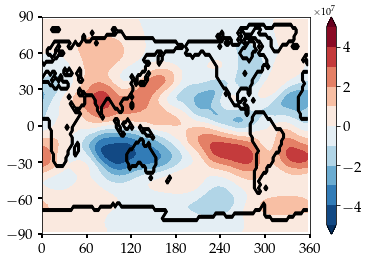

In [80]:
m=10
plot_stream_geo(st,m,h=0)

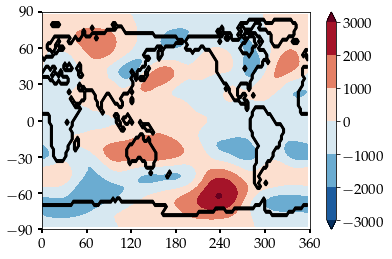

In [81]:
plot_stream_geo(ht,m,h=1)

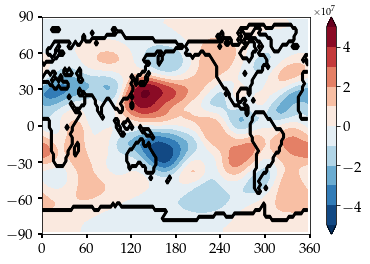

In [82]:
m=11
plot_stream_geo(st,m,h=0)

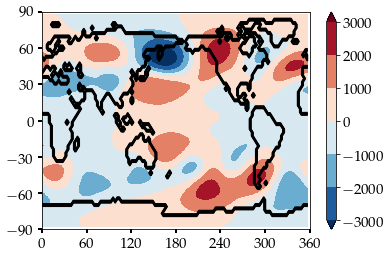

In [83]:
plot_stream_geo(ht,m,h=1)

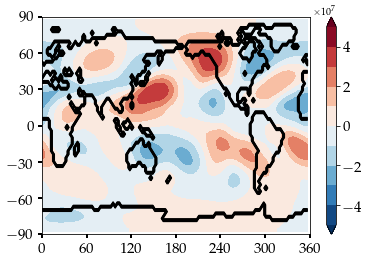

In [84]:
m=0
plot_stream_geo(st,m,h=0)

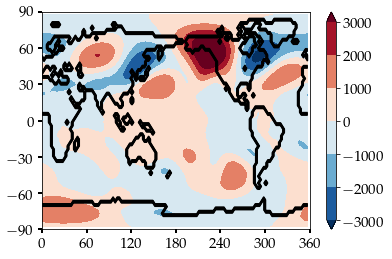

In [85]:
plot_stream_geo(ht,m,h=1)

In [25]:
ht  = load(source+"ht_temp_sphum.hkl")['ht'] 

In [26]:
ht=ht.reshape((12,30,4,20,len(lat),len(lon))).mean(axis=1).mean(axis=1)